In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [10]:
from pickle import NONE
pd.set_option('max_row', None)

In [ ]:
jan = pd.read_csv('/content/drive/MyDrive/Portfolio_Cycle/202201-divvy-tripdata.csv')
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [ ]:
jan.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [ ]:
jan['started_at'] = pd.to_datetime(jan['started_at'])
jan['ended_at'] = pd.to_datetime(jan['ended_at'])

In [ ]:
jan['duration'] = jan['ended_at']-jan['started_at']
jan['duration'].head()

0   0 days 00:02:57
1   0 days 00:04:21
2   0 days 00:04:21
3   0 days 00:14:56
4   0 days 00:06:02
Name: duration, dtype: timedelta64[ns]

In [ ]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [ ]:
jan.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
duration                  0
dtype: int64

In [ ]:
#Check duplicate
jan.duplicated(subset=['ride_id']).sum()

0

## Start Long-Lat NULL Variable

In [ ]:
jan[jan['start_station_id'].isna()].reset_index(drop=True).head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
#assign null
jan_null = jan[jan['start_station_id'].isna()].reset_index(drop=True)

In [ ]:
jan_null.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

## End Long-Lat NULL Variable

In [ ]:
jan[jan['end_station_id'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
510,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,NaN,41.897632,-87.643388,41.90,-87.64,member,0 days 00:01:26
512,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,NaN,41.890000,-87.720000,41.90,-87.71,member,0 days 00:05:20
19594,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,NaN,NaN,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
19595,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,NaN,NaN,41.902747,-87.709244,41.92,-87.67,casual,0 days 00:41:52
19596,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,NaN,NaN,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
#assign null variable
jan_null_end = jan[jan['end_station_id'].isna()].reset_index(drop=True)

In [ ]:
jan_null_end.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10545
start_station_id      10545
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
duration                  0
dtype: int64

##Start Long-Lat Reference Variable

In [ ]:
#Kolom referensi
jan_ref = jan.groupby(by=['start_station_id']).median().reset_index()
jan_ref.head()

,start_station_id,start_lat,start_lng,end_lat,end_lng
0,13001,41.883984,-87.624684,41.883380,-87.631890
1,13006,41.882664,-87.632530,41.884596,-87.632530
2,13008,41.881032,-87.624084,41.880958,-87.624084
3,13011,41.879255,-87.639904,41.884576,-87.636390
4,13016,41.894345,-87.622798,41.893808,-87.634362


In [ ]:
jan_ref[jan_ref.duplicated(subset=['start_lat', 'start_lng'])]

,start_station_id,start_lat,start_lng,end_lat,end_lng
273,20251.0,41.89,-87.65,41.885837,-87.639904
297,326,41.95,-87.81,41.955835,-87.712320
305,341,41.82,-87.70,41.820000,-87.700000
314,352,41.93,-87.80,41.930000,-87.810000
315,353,41.93,-87.78,41.925000,-87.765000
319,357,41.92,-87.75,41.920000,-87.750000
320,358,41.93,-87.74,41.930000,-87.750000
325,365.0,41.84,-87.73,41.850000,-87.720000
326,368.0,41.84,-87.73,41.840000,-87.710000
328,370,41.90,-87.72,41.900000,-87.710000


In [ ]:
jan_ref[(jan_ref['start_lat']==41.657074332) &  (jan_ref['start_lng']==-87.598875642)]

,start_station_id,start_lat,start_lng,end_lat,end_lng
248,20212,41.657074,-87.598876,41.66,-87.6


## End Long-Lat Reference Variable

In [ ]:
jan_ref_end = jan.groupby(by=['end_station_id']).median().reset_index()
jan_ref_end.head(5)

,end_station_id,start_lat,start_lng,end_lat,end_lng
0,13001,41.883246,-87.633502,41.883984,-87.624684
1,13006,41.884241,-87.632517,41.882664,-87.632530
2,13008,41.881032,-87.623981,41.881032,-87.624084
3,13011,41.886024,-87.634317,41.879255,-87.639904
4,13016,41.893895,-87.632326,41.894345,-87.622798


## Loop to Reference Variable

In [ ]:
#Search the nearest number FUNCTION
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
find_nearest(jan_ref['start_lat'], 41.95)

41.95

In [ ]:
z=[]
q=[]
#START Long-Lat Loop Section
for i, x in enumerate(jan_null['start_lat']):
  z.append(x)
  new_lat = find_nearest(jan_ref['start_lat'], x)
  jan_null.iloc[i, 8] = new_lat
  ref_jan = jan_ref.loc[jan_ref['start_lat']==new_lat, 'start_lng'].reset_index(drop=True)
  #ref_null = jan_null.loc[jan_null['start_lat']==new_lat, 'start_lng']
  j=i
  new_long = find_nearest(ref_jan, jan_null.iloc[i, 9])
  jan_null.iloc[i, 9] = new_long
  q.append(j)
  jan_null.iloc[i, 5] = jan_ref.loc[(jan_ref['start_lat']==new_lat) & (jan_ref['start_lng']==new_long), 'start_station_id'].values[0]


In [ ]:
#END Long-Lat Loop Section
for i, x in enumerate(jan_null_end['end_lat']):
  z.append(x)
  new_end_lat = find_nearest(jan_ref_end['end_lat'], x)
  jan_null_end.iloc[i, 10] = new_end_lat
  ref_jan = jan_ref_end.loc[jan_ref_end['end_lat']==new_end_lat, 'end_lng'].reset_index(drop=True)
  #ref_null = jan_null.loc[jan_null['start_lat']==new_lat, 'start_lng']
  j=i
  new_end_long = find_nearest(ref_jan, jan_null_end.iloc[i, 11])
  jan_null_end.iloc[i, 11] = new_end_long
  q.append(j)
  jan_null_end.iloc[i, 7] = jan_ref_end.loc[(jan_ref_end['end_lat']==new_end_lat) & (jan_ref_end['end_lng']==new_end_long), 'end_station_id'].values[0]

In [ ]:
jan_null.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,312,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,431,Ashland Ave & Grace St,13319,41.95,-87.69,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,428,Ashland Ave & Grace St,13319,41.92,-87.70,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
jan_null_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,20249.0,41.897632,-87.643388,41.90,-87.63,member,0 days 00:01:26
1,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,370,41.890000,-87.720000,41.90,-87.72,member,0 days 00:05:20
2,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,NaN,435,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
3,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,NaN,20254.0,41.902747,-87.709244,41.92,-87.65,casual,0 days 00:41:52
4,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,NaN,434,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
#Loop Station Name
qw=[]
for i, x in enumerate(jan_null['start_station_id']):
  qw.append(x)
  jan_null.iloc[i, 4] = jan.loc[jan['start_station_id']==x, 'start_station_name'].values[0]

In [ ]:
#Loop Station ID
qw=[]
for i, x in enumerate(jan_null_end['end_station_id']):
  qw.append(x)
  jan_null_end.iloc[i, 6] = jan.loc[jan['end_station_id']==x, 'end_station_name'].values[0]

In [ ]:
jan_null.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,Lockwood Ave & Wrightwood Ave,312,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,Western Ave & Grace St,431,Ashland Ave & Grace St,13319,41.95,-87.69,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,Milwaukee Ave & Fullerton Ave,428,Ashland Ave & Grace St,13319,41.92,-87.70,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,Damen Ave & Wabansia Ave,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,Damen Ave & Wabansia Ave,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
jan_null_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,N Clark St & W Elm St,20249.0,41.897632,-87.643388,41.90,-87.63,member,0 days 00:01:26
1,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,Central Park & Augusta Blvd,370,41.890000,-87.720000,41.90,-87.72,member,0 days 00:05:20
2,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,Rockwell St & Fletcher St,435,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
3,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,W Armitage Ave & N Sheffield Ave,20254.0,41.902747,-87.709244,41.92,-87.65,casual,0 days 00:41:52
4,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,Albany Ave & Belmont Ave,434,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
jan_null.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

In [ ]:
jan_null_end.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10545
start_station_id      10545
end_station_name          0
end_station_id            0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

In [ ]:
jan[jan['start_station_name'].isna()].isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

## Loop to Main Variable

In [ ]:
qw=[]
#Joining two table for start_station
for i, x in enumerate(jan['ride_id']):
  if pd.isna(jan['start_station_name'].iloc[i]):
    
    jan.iloc[i,4] = jan_null.loc[jan_null['ride_id']==x, 'start_station_name'].values[0]
    jan.iloc[i,5] = jan_null.loc[jan_null['ride_id']==x, 'start_station_id'].values[0]
  else:
    qw.append(i)
    continue

In [ ]:
#Joining two table for end_station
for i, x in enumerate(jan['ride_id']):
  if pd.isna(jan['end_station_name'].iloc[i]):
    
    jan.iloc[i,6] = jan_null_end.loc[jan_null_end['ride_id']==x, 'end_station_name'].values[0]
    jan.iloc[i,7] = jan_null_end.loc[jan_null_end['ride_id']==x, 'end_station_id'].values[0]
  else:
    qw.append(i)
    continue

In [ ]:
jan.isna().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat               86
end_lng               86
member_casual          0
duration               0
dtype: int64

In [ ]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


## Drop Final NULL Values

In [ ]:
jan.shape

(103770, 14)

In [ ]:
jan.dropna(inplace=True)

In [ ]:
jan.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration              0
dtype: int64

In [ ]:
jan.shape

(103684, 14)

In [ ]:
jan.to_csv('/content/drive/MyDrive/Portfolio_Cycle/jan_final.csv', index=False)

# Data Exploration

In [69]:
jan22 = pd.read_csv('/content/drive/MyDrive/Portfolio_Cycle/jan_final.csv')
jan22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [70]:
jan22.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration              0
dtype: int64

In [71]:
jan22['started_at'] = pd.to_datetime(jan22['started_at'])
jan22['ended_at'] = pd.to_datetime(jan22['ended_at'])

In [72]:
for i, x in enumerate(jan22['ride_id']):
  jan22['duration'].iloc[i] = (jan22['ended_at'].iloc[i]-jan22['started_at'].iloc[i]).total_seconds()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [73]:
jan22['duration'] = jan22['duration'].astype(int)

In [74]:
jan22.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
duration                       int64
dtype: object

## Rideably Type

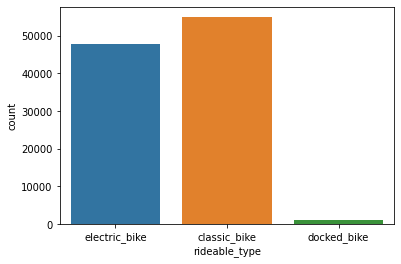

In [75]:
sns.countplot(x='rideable_type', data=jan22)
plt.show()

- slight difference between electric and classic, and not enough interest for docked bike

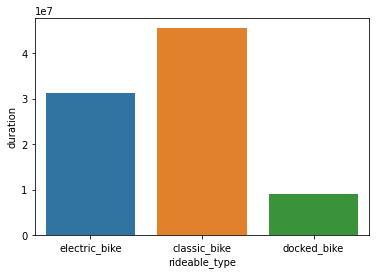

In [76]:
sns.barplot(x='rideable_type', y='duration', data=jan22, estimator=sum, ci=None)

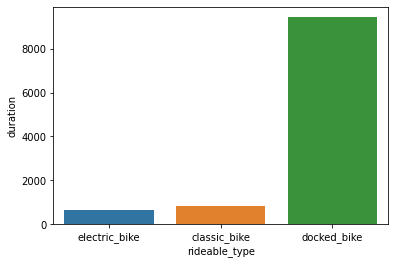

In [77]:
sns.barplot(x='rideable_type', y='duration', data=jan22, ci=None)

- classic bike still dominates total duration (seconds)
- despite the low usage, most of the docked bike user has a much longer duration per user than electric bike and classic bike

### Type Specific Time

#### Day Sum

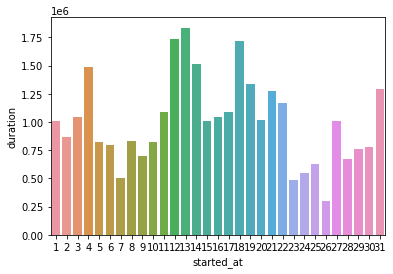

In [102]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=sum, ci=None)

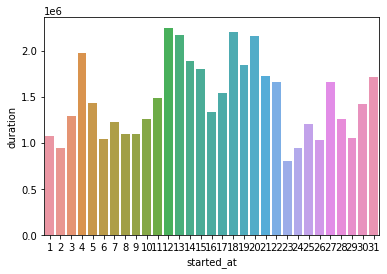

In [104]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=sum, ci=None)

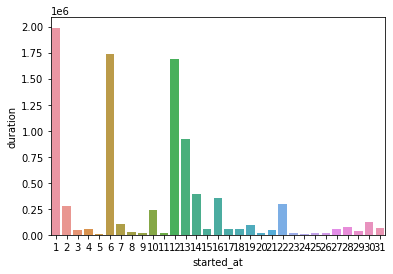

In [105]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=sum, ci=None)

- electric bike and classic bike has similar distribution
- docked bike has abnormal behaviour pattern

#### Day MEDIAN

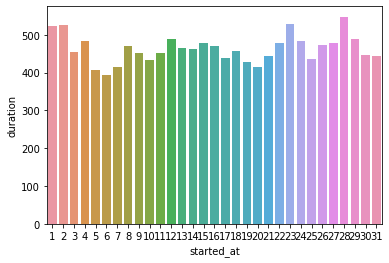

In [109]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=np.median, ci=None)

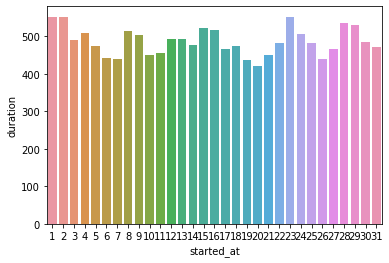

In [110]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=np.median, ci=None)

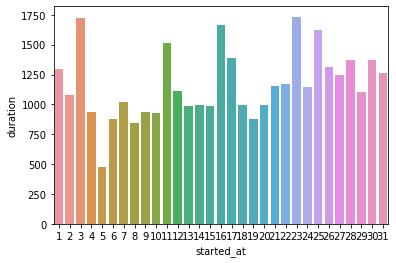

In [111]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=np.median, ci=None)

#### Time SUM

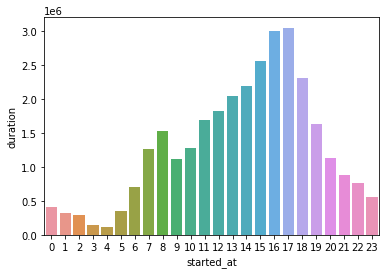

In [103]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=sum, ci=None)

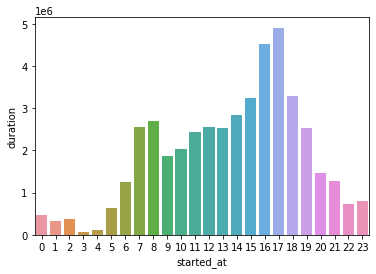

In [107]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=sum, ci=None)

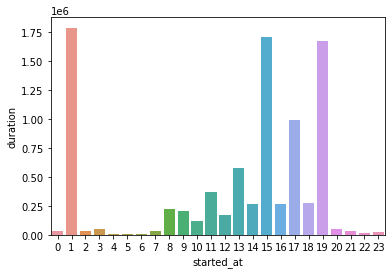

In [108]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=sum, ci=None)

- docked has abnormal pattern

#### Time MEDIAN

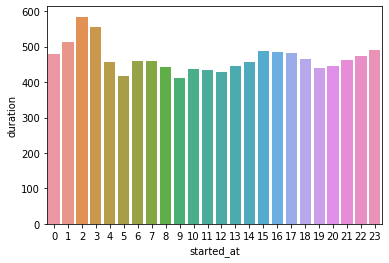

In [112]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=np.median, ci=None)

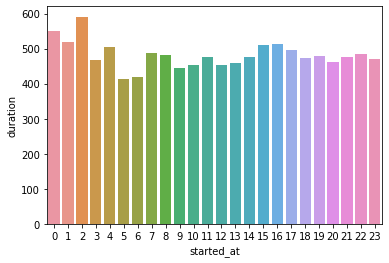

In [113]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=np.median, ci=None)

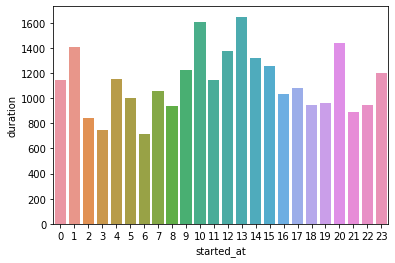

In [114]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=np.median, ci=None)

## Member or Casual

### Member Type

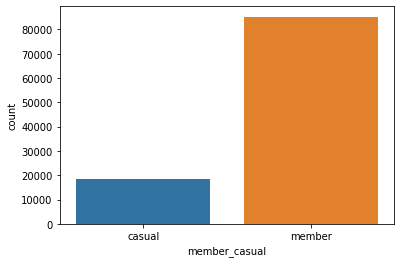

In [78]:
sns.countplot(x='member_casual', data=jan22)
plt.show()

- most of the user is registered as member

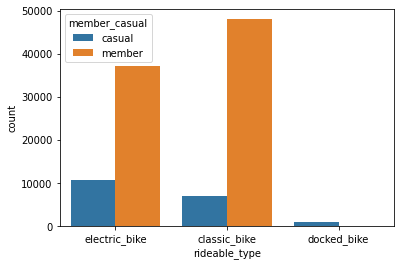

In [79]:
sns.countplot(x='rideable_type', hue='member_casual', data=jan22)
plt.show()

- docked bike doesnt have member user, it might reserved for casual user (?)

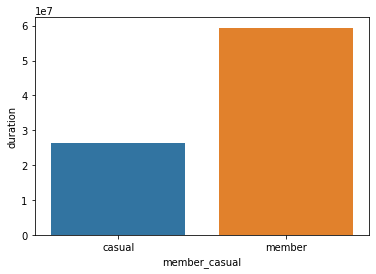

In [80]:
sns.barplot(x='member_casual', y='duration', data=jan22, estimator=sum, ci=None)

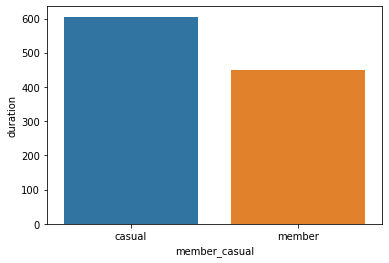

In [100]:
sns.barplot(x='member_casual', y='duration', estimator=np.median, data=jan22, ci=None)

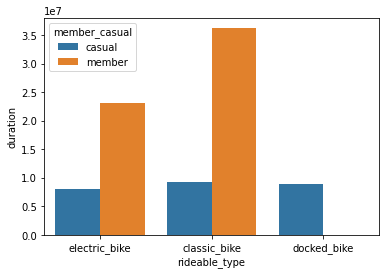

In [82]:
sns.barplot(x='rideable_type', y='duration', hue='member_casual', data=jan22, estimator=sum, ci=None)

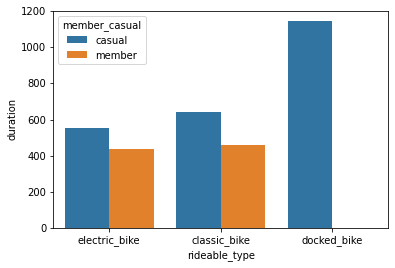

In [99]:
sns.barplot(x='rideable_type', y='duration', hue='member_casual', estimator=np.median, data=jan22, ci=None)

- member use more duration on the trip overall
- per casual user overall has more duration than per member user (especially docked bike user)

### Member Specific Time

#### Day SUM

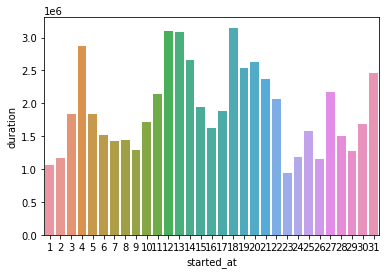

In [115]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], ci=None)

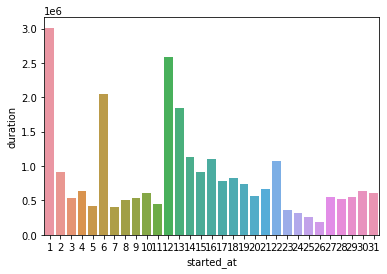

In [116]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], ci=None)

#### Day MEDIAN

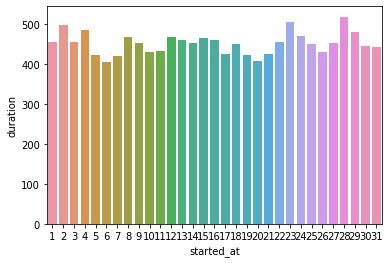

In [117]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='member'], ci=None)

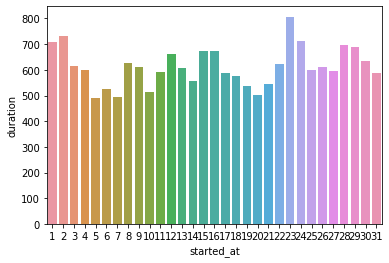

In [118]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='casual'], ci=None)

#### Time SUM

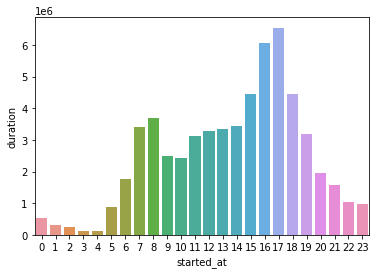

In [119]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], ci=None)

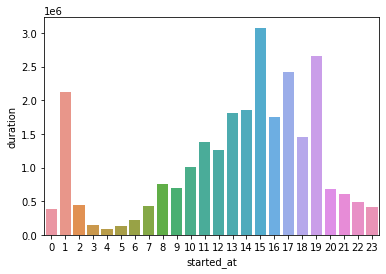

In [120]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], ci=None)

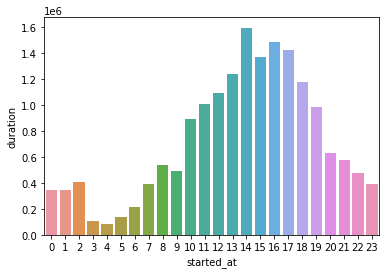

In [125]:
#Casual but without docked bike
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[(jan22['member_casual']=='casual') & (jan22['rideable_type']!='docked_bike')], ci=None)

- docked_bike in casual user causes irregularity (sharper peak-valley)
- mostly has the same pattern between member and casual

#### Time MEDIAN

## Specific Time

### Which days

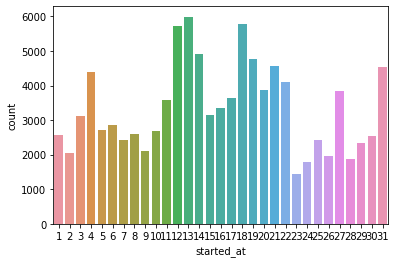

In [84]:
sns.countplot(x=jan22['started_at'].dt.day, data=jan22)

- theres no specific distribution regarding frequency due to days
- roughly more people using bike service during middle of the month

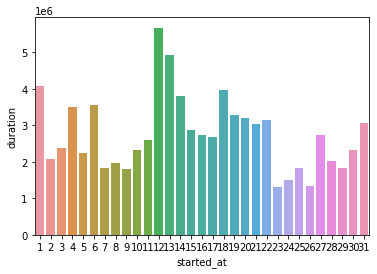

In [85]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22, estimator=sum, ci=None)

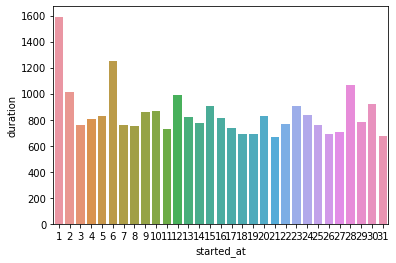

In [86]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22, ci=None)

- on total, middle of this month has mostly more user
- on average, there is a balance distrubition except for anomaly at 1st January

### Which hour

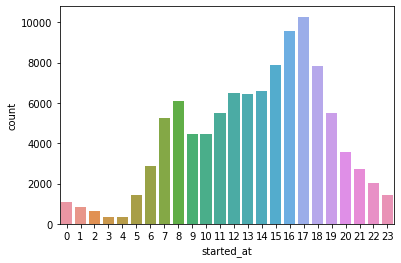

In [87]:
sns.countplot(x=jan22['started_at'].dt.hour, data=jan22)

- most of users are during working/school hours

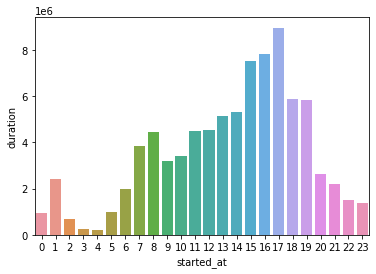

In [88]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22, estimator=sum, ci=None)

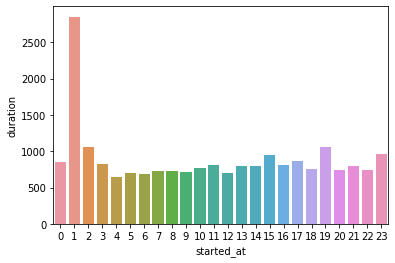

In [89]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22, ci=None)

- total of duration is similar to number of count
- average of duration is uniform, except anomaly at 01.00 AM

### Anomaly

In [90]:
#Let's take a look at the Anomaly!
jan22[jan22['started_at'].dt.hour==1].describe()

,start_lat,start_lng,end_lat,end_lng,duration
count,854.000000,854.000000,854.000000,854.000000,8.540000e+02
mean,41.907041,-87.656179,41.907867,-87.659242,2.850761e+03
std,0.050174,0.031125,0.051566,0.032864,6.009289e+04
min,41.670000,-87.800000,41.670000,-87.810000,0.000000e+00
25%,41.889906,-87.670000,41.889906,-87.677335,3.110000e+02
50%,41.910210,-87.650000,41.912616,-87.653449,5.245000e+02
75%,41.939397,-87.634656,41.940000,-87.638779,9.577500e+02
max,42.058239,-87.551254,42.057044,-87.551208,1.756266e+06


In [97]:
jan22[jan22['duration']==1756266.0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
47695,578BA30BA1348F18,docked_bike,2022-01-01 01:00:05,2022-01-21 08:51:11,Millennium Park,13008,Fairfield Ave & Roosevelt Rd,KA1504000102,41.881032,-87.624084,41.866624,-87.694521,casual,1756266


- there is a user that ride at 20 days starting at 1 January until 21 January (wow!) starting from 1 AM

## Station Name

### Most Popular Count

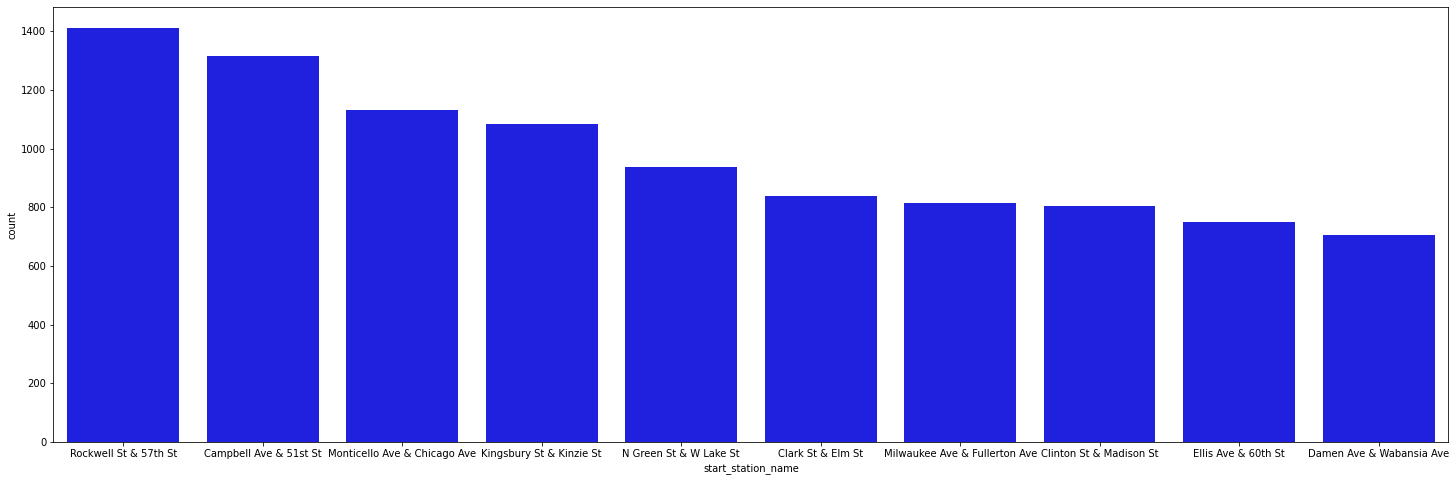

In [91]:
plt.figure(figsize=(25,8))
sns.countplot(x='start_station_name', data=jan22, color='b',
              order=jan22['start_station_name'].value_counts().iloc[:10].index)

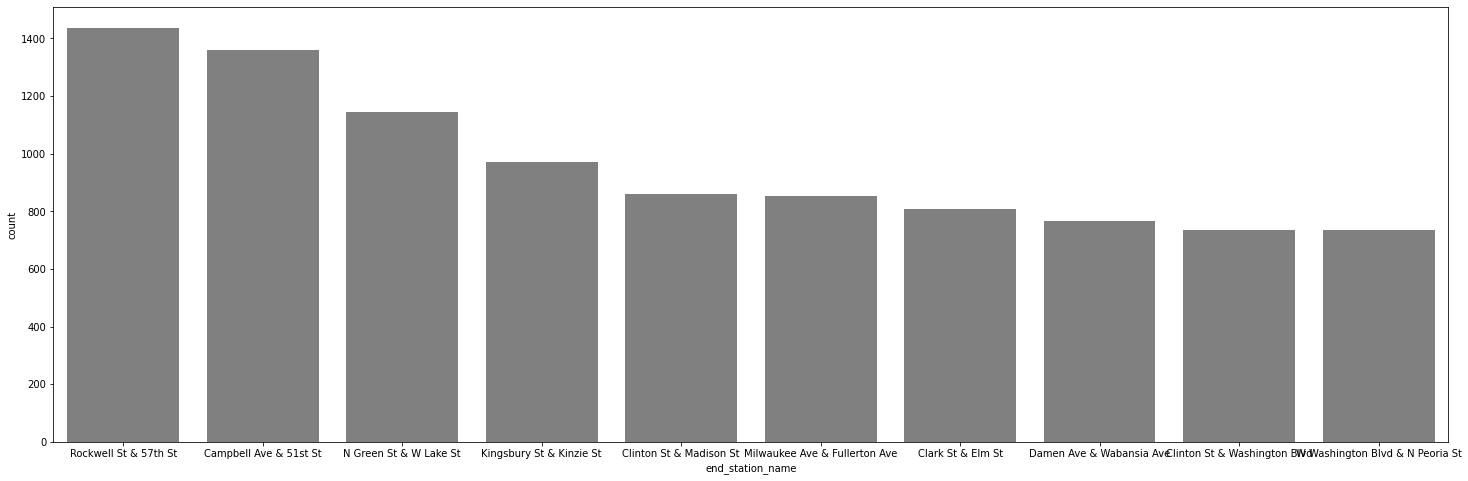

In [92]:
plt.figure(figsize=(25,8))
sns.countplot(x='end_station_name', data=jan22, color='grey',
              order=jan22['end_station_name'].value_counts().iloc[:10].index)

- rockwell, campbell, n green, clark, milwaukee ave, clinton, damen ave. 9 out of 10 most popular starting point station also is one of the most popular destination spot.
- it means the most popular station is cathering toward industry or academic spot (for transit)

### Least Popular Count

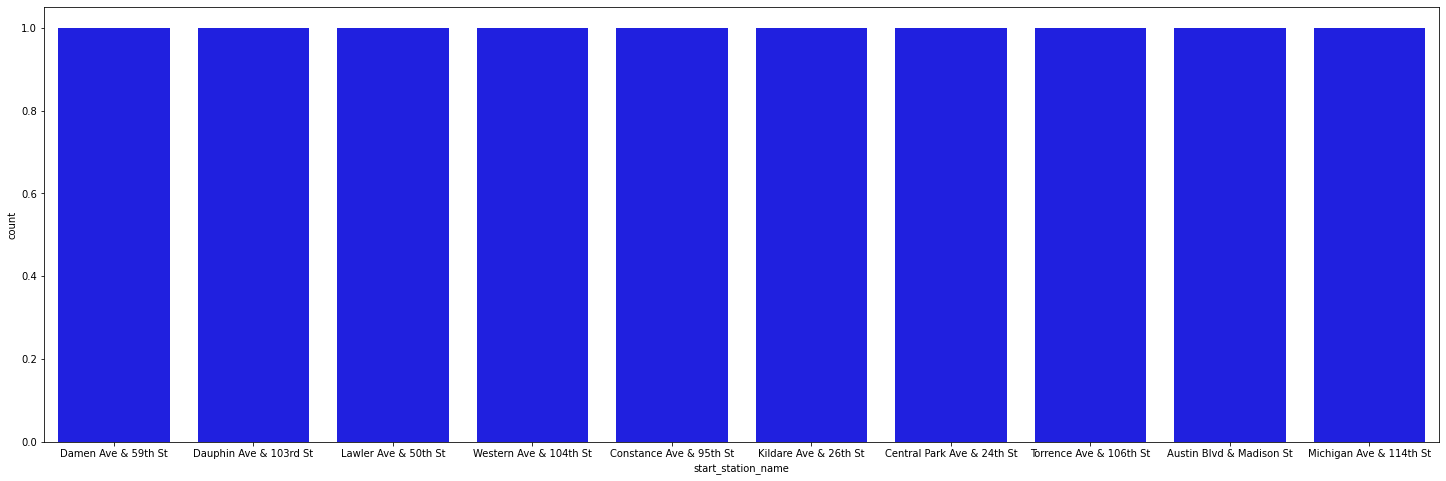

In [93]:
plt.figure(figsize=(25,8))
sns.countplot(x='start_station_name', data=jan22, color='blue',
              order=jan22['start_station_name'].value_counts().sort_values(ascending=True).iloc[:10].index)

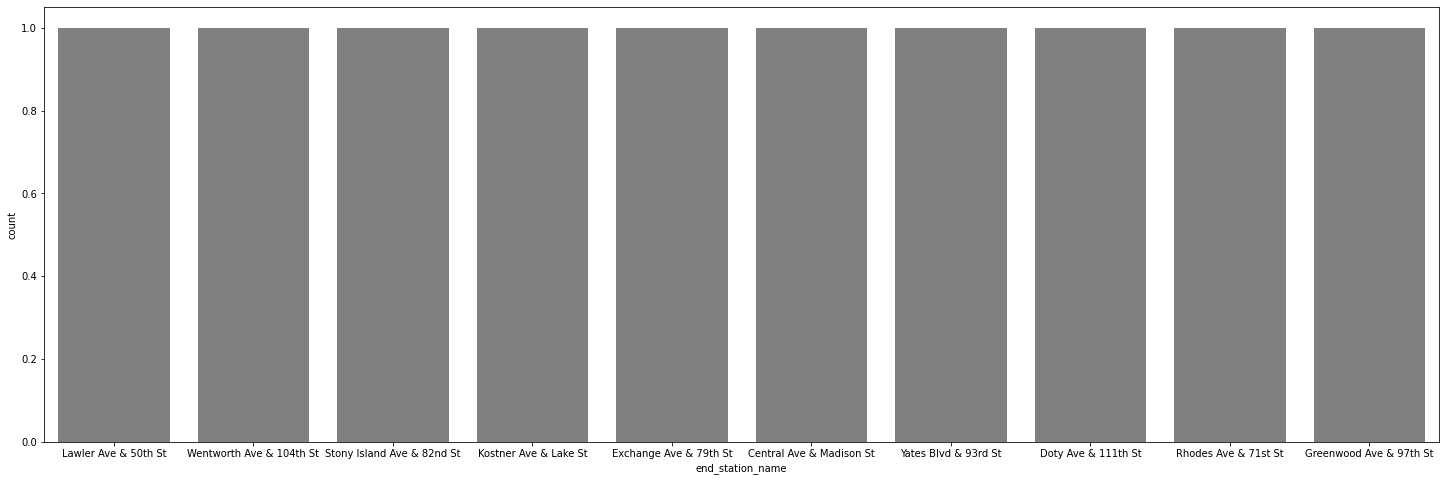

In [94]:
plt.figure(figsize=(25,8))
sns.countplot(x='end_station_name', data=jan22, color='grey',
              order=jan22['end_station_name'].value_counts().sort_values(ascending=True).iloc[:10].index)

- all of the least popular station only has 1 user this month
- either these are outlier or user tend to use station in other street within the same area